This notebook generates the figure illustrating the multi-step rollouts on non-uniform grids, as described in Supplementary Material Section 8.2.

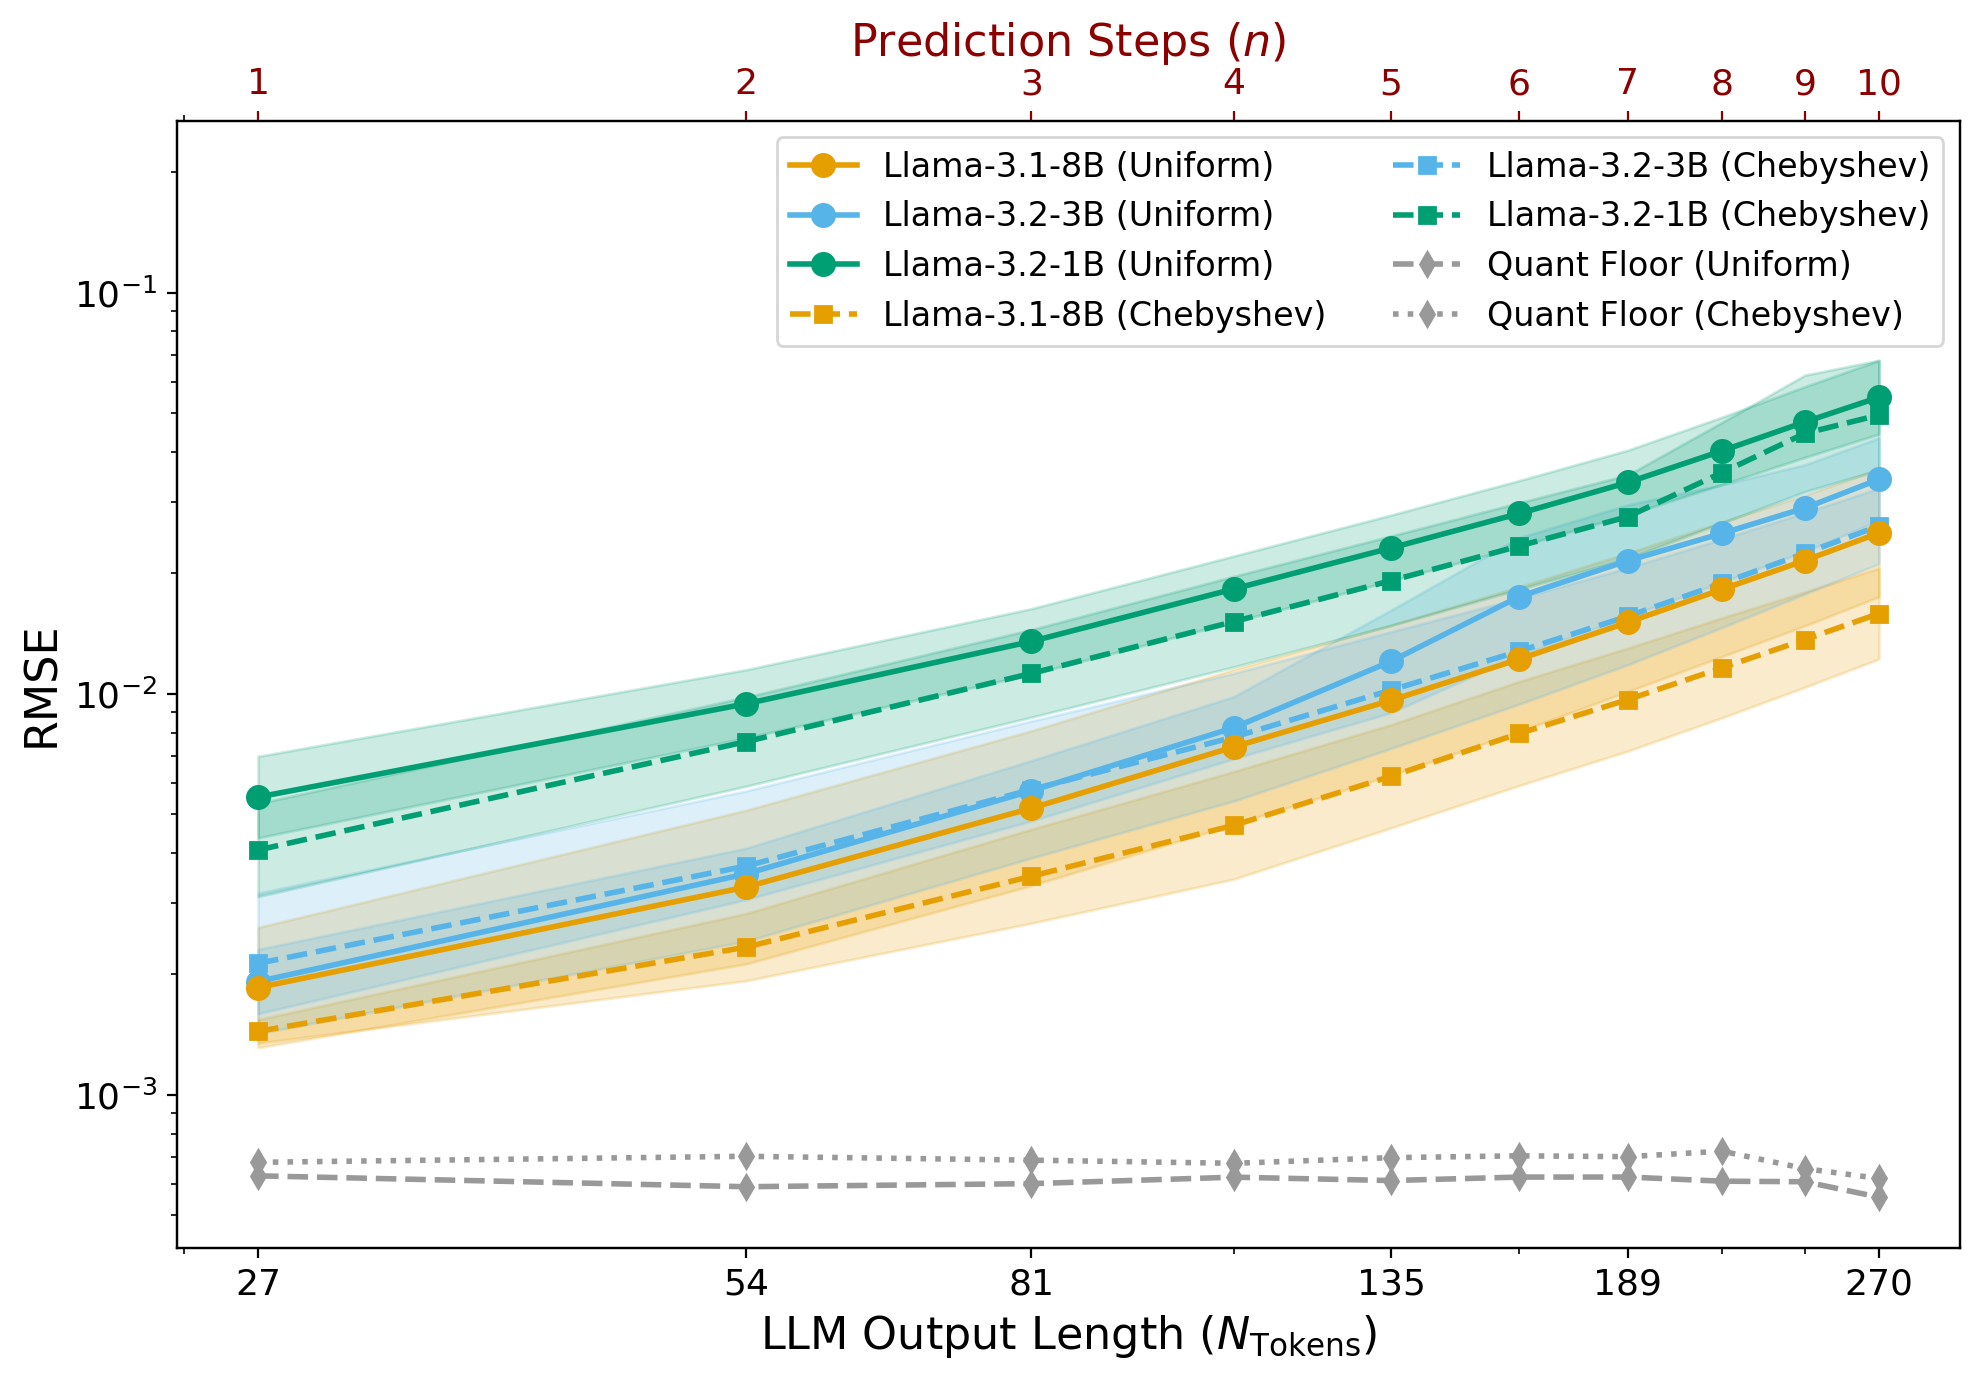

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load Llama-3.1-8B model data (uniform grid)
with np.load("8B_10_step.npz", allow_pickle=True) as data_8b:
    llm_rmses = data_8b["llm_rmses_8B"]
    ci_lower_rmses = data_8b["ci_lower_rmses_8B"]
    ci_upper_rmses = data_8b["ci_upper_rmses_8B"]
    baseline_rmse_errors_prediction = data_8b["avg_baseline_rmse_errors_prediction"]

# Load Llama-3.2-3B model data (uniform grid)
with np.load("3B_10_step.npz", allow_pickle=True) as data_3b:
    llm_rmses_3B = np.array(data_3b["llm_rmses_3B"])
    ci_lower_rmses_3B = data_3b["ci_lower_rmses_3B"]
    ci_upper_rmses_3B = data_3b["ci_upper_rmses_3B"]

# Load Llama-3.2-1B model data (uniform grid)
with np.load("1B_10_step.npz", allow_pickle=True) as data_1b:
    llm_rmses_1B = np.array(data_1b["llm_rmses_1B"])
    ci_lower_rmses_1B = data_1b["ci_lower_rmses_1B"]
    ci_upper_rmses_1B = data_1b["ci_upper_rmses_1B"]

# Load Llama-3.1-8B model data (Chebyshev grid)
with np.load("8B_10_step_chebyshev.npz", allow_pickle=True) as data_8b_cheb:
    llm_rmses_8B_cheb = data_8b_cheb["llm_rmses_8B_cheb"]
    ci_lower_rmses_8B_cheb = data_8b_cheb["ci_lower_rmses_8B_cheb"]
    ci_upper_rmses_8B_cheb = data_8b_cheb["ci_upper_rmses_8B_cheb"]
    baseline_rmse_errors_prediction_cheb = data_8b_cheb["avg_baseline_rmse_errors_prediction"]

# Load Llama-3.2-3B model data (Chebyshev grid)
with np.load("3B_10_step_chebyshev.npz", allow_pickle=True) as data_3b_cheb:
    llm_rmses_3B_cheb = np.array(data_3b_cheb["llm_rmses_3B_cheb"])
    ci_lower_rmses_3B_cheb = data_3b_cheb["ci_lower_rmses_3B_cheb"]
    ci_upper_rmses_3B_cheb = data_3b_cheb["ci_upper_rmses_3B_cheb"]

# Load Llama-3.2-1B model data (Chebyshev grid)
with np.load("1B_10_step_chebyshev.npz", allow_pickle=True) as data_1b_cheb:
    llm_rmses_1B_cheb = np.array(data_1b_cheb["llm_rmses_1B_cheb"])
    ci_lower_rmses_1B_cheb = data_1b_cheb["ci_lower_rmses_1B_cheb"]
    ci_upper_rmses_1B_cheb = data_1b_cheb["ci_upper_rmses_1B_cheb"]

# Setup figure
fig, ax = plt.subplots(figsize=(10, 7), dpi=200)
steps_array = np.arange(1, len(llm_rmses) + 1)

colors = [
    "#E69F00",  # Llama-3.1-8B
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#999999",  # Quant floor
]

linewidth = 2
reference_index = 6
rmse_reference_avg = llm_rmses[reference_index]
power_law_rmse_avg = [rmse_reference_avg * n for n in steps_array]

# Plot RMSE from uniform grid (solid lines)
ax.loglog(steps_array, llm_rmses, 'o-', label='Llama-3.1-8B (Uniform)',
          color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax.fill_between(steps_array, ci_lower_rmses, ci_upper_rmses,
                alpha=0.2, color=colors[0])

ax.loglog(steps_array, llm_rmses_3B, 'o-', label='Llama-3.2-3B (Uniform)',
          color=colors[1], markersize=8, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_3B, ci_upper_rmses_3B,
                alpha=0.2, color=colors[1])

ax.loglog(steps_array, llm_rmses_1B, 'o-', label='Llama-3.2-1B (Uniform)',
          color=colors[2], markersize=8, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_1B, ci_upper_rmses_1B,
                alpha=0.2, color=colors[2])

# Plot RMSE from Chebyshev grid (dashed lines)
ax.loglog(steps_array, llm_rmses_8B_cheb, 's--', label='Llama-3.1-8B (Chebyshev)',
          color=colors[0], markersize=6, linewidth=linewidth, zorder=5)
ax.fill_between(steps_array, ci_lower_rmses_8B_cheb, ci_upper_rmses_8B_cheb,
                alpha=0.2, color=colors[0])

ax.loglog(steps_array, llm_rmses_3B_cheb, 's--', label='Llama-3.2-3B (Chebyshev)',
          color=colors[1], markersize=6, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_3B_cheb, ci_upper_rmses_3B_cheb,
                alpha=0.2, color=colors[1])

ax.loglog(steps_array, llm_rmses_1B_cheb, 's--', label='Llama-3.2-1B (Chebyshev)',
          color=colors[2], markersize=6, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_1B_cheb, ci_upper_rmses_1B_cheb,
                alpha=0.2, color=colors[2])

# Plot quant floors
ax.loglog(steps_array, baseline_rmse_errors_prediction, 'd--', color=colors[3],
          label='Quant Floor (Uniform)', markersize=6, linewidth=linewidth)
ax.loglog(steps_array, baseline_rmse_errors_prediction_cheb, 'd:', color=colors[3],
          label='Quant Floor (Chebyshev)', markersize=6, linewidth=linewidth)

ax.set_xlabel(r"LLM Output Length ($N_{\text{Tokens}}$)", fontsize=16)
ax.set_ylabel("RMSE", fontsize=16)

# Set y-axis range
all_data = [llm_rmses, llm_rmses_3B, llm_rmses_1B, 
            llm_rmses_8B_cheb, llm_rmses_3B_cheb, llm_rmses_1B_cheb,
            baseline_rmse_errors_prediction, baseline_rmse_errors_prediction_cheb,
            ci_lower_rmses, ci_upper_rmses, ci_lower_rmses_3B, ci_upper_rmses_3B,
            ci_lower_rmses_1B, ci_upper_rmses_1B,
            ci_lower_rmses_8B_cheb, ci_upper_rmses_8B_cheb,
            ci_lower_rmses_3B_cheb, ci_upper_rmses_3B_cheb,
            ci_lower_rmses_1B_cheb, ci_upper_rmses_1B_cheb]
y_min = min(np.min(data) for data in all_data if len(data) > 0)
y_max = 2e-1
log_range = np.log10(y_max) - np.log10(y_min)
y_min_padded = 10**(np.log10(y_min) - 0.05 * log_range)
y_max_padded = 10**(np.log10(y_max) + 0.05 * log_range)
ax.set_ylim(y_min_padded, y_max_padded)

# Set x-axis ticks
selected_positions = [1, 2, 3, 5, 7, 10]
selected_tick_positions = [pos for pos in steps_array if pos in selected_positions]
token_tick_labels = [str(int(pos * 27)) for pos in selected_tick_positions]
ax.set_xticks(selected_tick_positions)
ax.set_xticklabels(token_tick_labels)
ax.tick_params(axis='both', which='major', labelsize=13)
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xscale('log')
ax_top.set_xticks(list(steps_array))
ax_top.set_xticklabels([str(int(pos)) for pos in steps_array])
ax_top.set_xlabel("Prediction Steps ($n$)", fontsize=16, color='darkred')
ax_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')
ax.legend(loc='best', fontsize=12, ncol=2)

plt.tight_layout()
plt.show()